# 3. Normalization

## Dependencies

In [1]:
import pandas as pd
import numpy as np
#pd.set_option('display.max_rows', 50)
#pd.set_option('display.max_colwidth', 1000)
from nltk.tokenize import RegexpTokenizer
import pickle
import spacy
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import time
from wordcloud import WordCloud

## Data

In [2]:
data=pd.read_csv('english_to_french_movies.csv')  
data_name = "En_to_fr_movie"
data

,rating,review,translation
0,0,A great example of how didactism bores rather ...,Un excellent exemple de la façon dont la didac...
1,0,"There was not even one funny content, sloppy d...","Il n'y avait même pas un contenu drôle, des di..."
2,0,Zootopia is Disney's latest propaganda piece f...,La Zootopie est Disneys Dernière pièce de prop...
3,0,Disney does not make movies for children anymo...,Disney ne fait plus de films pour enfants. Ils...
4,0,Zootopia. A popular and buzz worthy film. But ...,Zootopie. Un film de buzz et buzz. Mais pourqu...
...,...,...,...
159995,1,"If you've ever seen a UFO, this will chill you...","Si vous avez déjà vu un OVNI, cela refroidira ..."
159996,1,"So when I first heard about this movie, I thou...","Alors, quand j'ai entendu parler de ce film, j..."
159997,1,I absolutely enjoyed this one. As a person who...,J'ai vraiment apprécié celui-ci.En tant que pe...
159998,1,I haven't reviewed anything for a very long ti...,Je n'ai pas examiné quelque chose depuis très ...


In [5]:
data=pickle.load(open("english_to_french_film.dataset", "rb"))
data_name = "En_to_fr_movie"
data

,rating,review,translation,review_proc,review_proc+lemma,translation_proc,translation_proc+lemma
0,0,A great example of how didactism bores rather ...,Un excellent exemple de la façon dont la didac...,great example how didactism bores rather than ...,great example how didactism bore rather than i...,excellent exemple façon dont didactisme est pl...,excellent exemple façon dont didactisme être p...
1,0,"There was not even one funny content, sloppy d...","Il n'y avait même pas un contenu drôle, des di...",There was not even one funny content sloppy di...,there be not even one funny content sloppy dia...,avait même pas contenu des dialogues clés hist...,avoir même pas contenu de dialogue clé histoir...
2,0,Zootopia is Disney's latest propaganda piece f...,La Zootopie est Disneys Dernière pièce de prop...,Zootopia Disney latest propaganda piece for th...,Zootopia Disney late propaganda piece for the ...,Zootopie est Disneys Dernière pièce propagande...,Zootopie être disneys dernier pièce propagande...
3,0,Disney does not make movies for children anymo...,Disney ne fait plus de films pour enfants. Ils...,Disney does not make movies for children anymo...,Disney do not make movie for child anymore -PR...,Disney fait plus films pour enfants Ils font d...,disney faire plus film pour enfant il faire un...
4,0,Zootopia. A popular and buzz worthy film. But ...,Zootopie. Un film de buzz et buzz. Mais pourqu...,Zootopia popular and buzz worthy film But why ...,Zootopia popular and buzz worthy film but why ...,Zootopie film buzz buzz Mais pourquoi Cela rie...,Zootopie film buzz buzz mais pourquoi cela rie...
...,...,...,...,...,...,...,...
159995,1,"If you've ever seen a UFO, this will chill you...","Si vous avez déjà vu un OVNI, cela refroidira ...",If you ever seen UFO this will chill your bloo...,if -PRON- ever see UFO this will chill -PRON- ...,Si vous avez déjà OVNI cela refroidira votre s...,si vous avoir déjà ovni cela refroidir votre s...
159996,1,"So when I first heard about this movie, I thou...","Alors, quand j'ai entendu parler de ce film, j...",So when first heard about this movie thought l...,so when first hear about this movie thought lo...,Alors quand entendu parler film pensais que av...,alors quand entendre parler film pensai que av...
159997,1,I absolutely enjoyed this one. As a person who...,J'ai vraiment apprécié celui-ci.En tant que pe...,absolutely enjoyed this one person who has see...,absolutely enjoy this one person who have see ...,vraiment apprécié celui tant que personne qui ...,vraiment apprécier celui tant que personne qui...
159998,1,I haven't reviewed anything for a very long ti...,Je n'ai pas examiné quelque chose depuis très ...,haven reviewed anything for very long time des...,haven review anything for very long time despi...,pas examiné quelque chose depuis très longtemp...,pas examiner quelque chose depuis très longtem...


## Normalization

In [4]:
# Create the second and third version of normalization consisting in the suppression of web page, mention and hashtags,
# everything except letters in the alphabet of the given language et small words except some exceptions

# The suppression of the stopwords is (if needed) done just before the vectorisation

English = True

if English:
    data['review_proc'] = data['review'].replace(to_replace=[r"http\S+|@\S+|#\S+"], value=[""], regex=True)
    data['review_proc'] = data['review_proc'].str.replace("[^a-zA-Z]", " ")
    data['review_proc'] = data['review_proc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or 
                                            w=="no" or w=="so" or w=="So" or w=="No" or w=="If" or w=="if"]))

    load_model = spacy.load('en_core_web_sm')

    tokenized0 = [None]*len(data)
    for i in range(len(data['review_proc'])):
        doc = load_model(data['review_proc'].iloc[i])
        tokenized0[i] = " ".join([token.lemma_ for token in doc])
        if i%1600==0:
            print("Obs %.0f -------------------------------------------------------------------------" % (i), end="\r")

    data['review_proc+lemma'] = tokenized0

    data['translation_proc'] = data['translation'].replace(to_replace=[r"http\S+|@\S+|#\S+"], value=[""], regex=True)
    data['translation_proc'] = data['translation_proc'].str.replace("[^a-zA-Zéèàêçù]", " ")
    data['translation_proc'] = data['translation_proc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or 
                                                                            w=="si" or w=="ni" or w=="Si" or w=="Ni"]))

    load_model = spacy.load('fr_core_news_sm')

    tokenized1 = [None]*len(data)
    for i in range(len(data['translation_proc'])):
        doc = load_model(data['translation_proc'].iloc[i])
        tokenized1[i] = " ".join([token.lemma_ for token in doc])
        if i%1600==0:
            print("Obs %.0f -------------------------------------------------------------------------" % (i), end="\r")

    data['translation_proc+lemma'] = tokenized1 
    
else:
    data['review_proc'] = data['review'].replace(to_replace=[r"http\S+|@\S+|#\S+"], value=[""], regex=True)
    data['review_proc'] = data['review_proc'].str.replace("[^a-zA-Zéèàêçù]", " ")
    data['translation_proc'] = data['translation_proc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or 
                                                                            w=="si" or w=="ni" or w=="Si" or w=="Ni"]))

    load_model = spacy.load('fr_core_news_sm')

    tokenized0 = [None]*len(data)
    for i in range(len(data['review_proc'])):
        doc = load_model(data['review_proc'].iloc[i])
        tokenized0[i] = " ".join([token.lemma_ for token in doc]) #if not token.lemma_ in all_stopwords
        if i%1600==0:
            print("Obs %.0f -------------------------------------------------------------------------" % (i), end="\r")
    data['review_proc+lemma'] = tokenized0

    data['translation_proc'] = data['translation'].replace(to_replace=[r"http\S+|@\S+|#\S+"], value=[""], regex=True)
    data['translation_proc'] = data['translation_proc'].str.replace("[^a-zA-Z]", " ")
    data['review_proc'] = data['review_proc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2 or 
                                            w=="no" or w=="so" or w=="So" or w=="No" or w=="If" or w=="if"]))

    load_model = spacy.load('en_core_web_sm')

    tokenized1 = [None]*len(data)
    for i in range(len(data['translation_proc'])):
        doc = load_model(data['translation_proc'].iloc[i])
        tokenized1[i] = " ".join([token.lemma_ for token in doc]) #if not token.lemma_ in all_stopwords
        if i%1600==0:
            print("Obs %.0f -------------------------------------------------------------------------" % (i), end="\r")

    data['translation_proc+lemma'] = tokenized1 

Obs 158400 -----------------------------------------------------------------------------------------------


In [74]:
data

,rating,review,translation,review_proc,review_proc+lemma,translation_proc,translation_proc+lemma
0,0,A great example of how didactism bores rather ...,Un excellent exemple de la façon dont la didac...,great example how didactism bores rather than ...,great example how didactism bore rather than i...,excellent exemple façon dont didactisme est pl...,excellent exemple façon dont didactisme être p...
1,0,"There was not even one funny content, sloppy d...","Il n'y avait même pas un contenu drôle, des di...",There was not even one funny content sloppy di...,there be not even one funny content sloppy dia...,avait même pas contenu des dialogues clés hist...,avoir même pas contenu de dialogue clé histoir...
2,0,Zootopia is Disney's latest propaganda piece f...,La Zootopie est Disneys Dernière pièce de prop...,Zootopia Disney latest propaganda piece for th...,Zootopia Disney late propaganda piece for the ...,Zootopie est Disneys Dernière pièce propagande...,Zootopie être disneys dernier pièce propagande...
3,0,Disney does not make movies for children anymo...,Disney ne fait plus de films pour enfants. Ils...,Disney does not make movies for children anymo...,Disney do not make movie for child anymore -PR...,Disney fait plus films pour enfants Ils font d...,disney faire plus film pour enfant il faire un...
4,0,Zootopia. A popular and buzz worthy film. But ...,Zootopie. Un film de buzz et buzz. Mais pourqu...,Zootopia popular and buzz worthy film But why ...,Zootopia popular and buzz worthy film but why ...,Zootopie film buzz buzz Mais pourquoi Cela rie...,Zootopie film buzz buzz mais pourquoi cela rie...
...,...,...,...,...,...,...,...
159995,1,"If you've ever seen a UFO, this will chill you...","Si vous avez déjà vu un OVNI, cela refroidira ...",If you ever seen UFO this will chill your bloo...,if -PRON- ever see UFO this will chill -PRON- ...,Si vous avez déjà OVNI cela refroidira votre s...,si vous avoir déjà ovni cela refroidir votre s...
159996,1,"So when I first heard about this movie, I thou...","Alors, quand j'ai entendu parler de ce film, j...",So when first heard about this movie thought l...,so when first hear about this movie thought lo...,Alors quand entendu parler film pensais que av...,alors quand entendre parler film pensai que av...
159997,1,I absolutely enjoyed this one. As a person who...,J'ai vraiment apprécié celui-ci.En tant que pe...,absolutely enjoyed this one person who has see...,absolutely enjoy this one person who have see ...,vraiment apprécié celui tant que personne qui ...,vraiment apprécier celui tant que personne qui...
159998,1,I haven't reviewed anything for a very long ti...,Je n'ai pas examiné quelque chose depuis très ...,haven reviewed anything for very long time des...,haven review anything for very long time despi...,pas examiné quelque chose depuis très longtemp...,pas examiner quelque chose depuis très longtem...


In [10]:
# Saves the preprocessed dataset
pickle.dump(data, open("english_to_french_film.dataset", "wb")) 

## Wordclouds and exploration

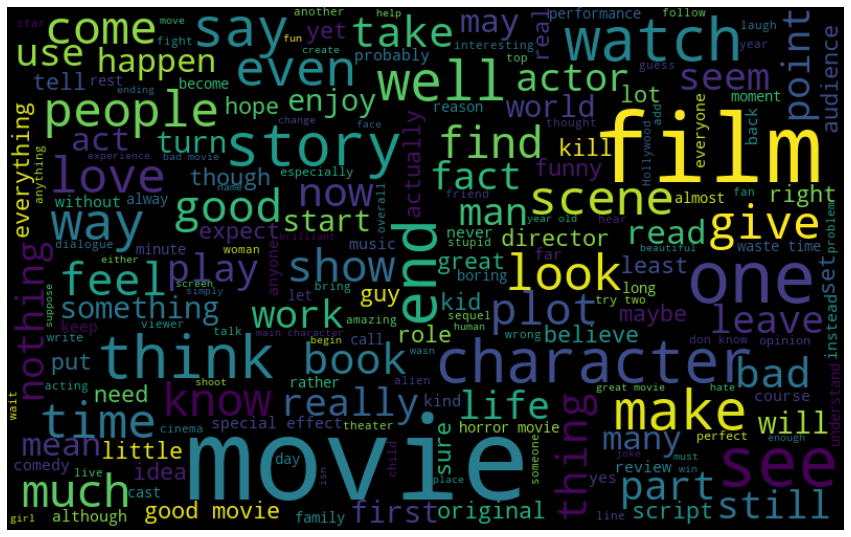

In [83]:
#Definition
column = "review"

#Proprecessing
data[column] = data[column].replace(to_replace=["-PRON-","être"], value=["",""], regex=True)
data[column] = data[column].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
all_words = ' '.join([text for text in data[column]]) 

#Plotting
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig("plot/"+data_name+"/wordcloud "+column+".png",bbox_inches="tight")
plt.show()